## Redo of data exploration: LA country vacant parcel data
### I'm practicing code previously learned in LA natural areas and census assignements from weeks 2 and 3

I am doing a data exploration this week of a spatial dataframe that we would like to layer on a map in a future assignment when we cover how to do that in this class.

Our team is interested in seeing how vacant parcel data can be spatially mapped through points and a chlorpleth map. For this notebook, I am going to start with a data exploration of a cvs file that I am also going to convert to a geojson.

As we are currently both based in Los Angeles and realized it could be interested to explore what taking back land for communities could look like in a city, we are going to focus regionally on Los Angeles County, and if necessary, limit the map area to south of Antelope Valley and Santa Clarita.

[Here is the source from LA County where I downloaded this data.](https://data.lacounty.gov/Parcel-/Vacant-Parcels-LA-County-from-ASR-Use-Code/vcaw-zeg9)

The file was close to 75 mb, I reduced down to 39 mb by deleting empty or redundant columns first. I will refer to the above link for the metadata on the meaning of the other columns.

First I am going to start off by importing some libraries

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Next I am going to import my csv file of vacant parcel data in LA County that I've uploaded to jupyter notebook.

vac = pd.read_csv('Vacant_Parcels_LA_County_ASR_Use_Code_2016.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# how big is this data

vac.shape

(176156, 15)

In [4]:
# first five rows
vac.head()

,TaxRateArea_CITY,AIN,TaxRateArea,AssessorID,PropertyUseCode,GeneralUseType,SpecificUseType,RecordingDate,SpecialParcelClassification,AdministrativeRegion,Cluster,ParcelBoundaryDescription,CENTER_LAT,CENTER_LON,Location 1
0,LOS ANGELES,2138012021,8852,2138-012-021,300V,Industrial,Industrial,20140123,,24,24820,OWENSMOUTH S 50 FT OF N 100 FT OF W 231.43 FT ...,34.196276,-118.597994,"(34.19627608, -118.59799422)"
1,LOS ANGELES,2146016020,16,2146-016-020,010V,Residential,Single Family Residence,20141112,,2,2163,"*LAND DESC IN DOC 0002484, 76-4-26 *TR=22481*P...",34.177912,-118.606336,"(34.17791177, -118.60633582)"
2,LOS ANGELES,2146035020,16,2146-035-020,010V,Residential,Single Family Residence,20090406,,2,2163,TR=53188 FOR DESC SEE ASSESSOR'S MAPS POR OF L...,34.173978,-118.610224,"(34.17397819, -118.61022349)"
3,LOS ANGELES,2156018047,16,2156-018-047,010V,Residential,Single Family Residence,20111007,,2,2158,P M 360-55-56 LOT B,34.177296,-118.545030,"(34.17729595, -118.54503046)"
4,LOS ANGELES,2157007066,16,2157-007-066,050V,Residential,Five or More Units or Apartments (Any Combinat...,19970805,,2,2412,TR=36573 LOT 1,34.171955,-118.529868,"(34.17195503, -118.52986827)"


In [5]:
# more info on type of data.

vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176156 entries, 0 to 176155
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TaxRateArea_CITY             176156 non-null  object 
 1   AIN                          176156 non-null  int64  
 2   TaxRateArea                  176156 non-null  int64  
 3   AssessorID                   176156 non-null  object 
 4   PropertyUseCode              176156 non-null  object 
 5   GeneralUseType               174849 non-null  object 
 6   SpecificUseType              174849 non-null  object 
 7   RecordingDate                176156 non-null  int64  
 8   SpecialParcelClassification  176156 non-null  object 
 9   AdministrativeRegion         176156 non-null  object 
 10  Cluster                      176156 non-null  int64  
 11  ParcelBoundaryDescription    176156 non-null  object 
 12  CENTER_LAT                   176062 non-null  float64
 13 

I notice it only has longitute and latitude as a csv file, which means this has to be converted for me to plot the points. TAs Chris and Ryan offered these resources for conversion:
https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html

I will now try to create a gpd from pd with this data

In [6]:
#I want to view the column headers again since I need to see what the column names are for latitude and longitude to figure out if I need to change the names

print(vac.columns)

Index(['TaxRateArea_CITY', 'AIN', 'TaxRateArea', 'AssessorID',
       'PropertyUseCode', 'GeneralUseType', 'SpecificUseType', 'RecordingDate',
       'SpecialParcelClassification', 'AdministrativeRegion', 'Cluster',
       'ParcelBoundaryDescription', 'CENTER_LAT', 'CENTER_LON', 'Location 1'],
      dtype='object')


In [7]:
#another way to see column headers corresponding with the data itself (without scrolling sideways)

print(vac.head())

  TaxRateArea_CITY         AIN  TaxRateArea    AssessorID PropertyUseCode  \
0      LOS ANGELES  2138012021         8852  2138-012-021            300V   
1      LOS ANGELES  2146016020           16  2146-016-020            010V   
2      LOS ANGELES  2146035020           16  2146-035-020            010V   
3      LOS ANGELES  2156018047           16  2156-018-047            010V   
4      LOS ANGELES  2157007066           16  2157-007-066            050V   

  GeneralUseType                                    SpecificUseType  \
0     Industrial                                         Industrial   
1    Residential                            Single Family Residence   
2    Residential                            Single Family Residence   
3    Residential                            Single Family Residence   
4    Residential  Five or More Units or Apartments (Any Combinat...   

   RecordingDate SpecialParcelClassification AdministrativeRegion  Cluster  \
0       20140123                

In [8]:
#list columns
vac.columns.to_list()

['TaxRateArea_CITY',
 'AIN',
 'TaxRateArea',
 'AssessorID',
 'PropertyUseCode',
 'GeneralUseType',
 'SpecificUseType',
 'RecordingDate',
 'SpecialParcelClassification',
 'AdministrativeRegion',
 'Cluster',
 'ParcelBoundaryDescription',
 'CENTER_LAT',
 'CENTER_LON',
 'Location 1']

In [9]:
# I want to rename columns so they have latitude and longtitude written out
vac.columns = ['TaxRateArea_CITY',
 'AIN',
 'TaxRateArea',
 'AssessorID',
 'PropertyUseCode',
 'GeneralUseType',
 'SpecificUseType',
 'RecordingDate',
 'SpecialParcelClassification',
 'AdministrativeRegion',
 'Cluster',
 'ParcelBoundaryDescription',
 'Latitude',
 'Longitude',
 'Location 1']

In [10]:
# I am now going to convert my dataframe to a geodataframe
gvac = gpd.GeoDataFrame(vac, geometry=gpd.points_from_xy(vac.Longitude, vac.Latitude))

In [11]:
#I am now going to see what this looks likes as a geodateframe. There is a geometry colum now
print(gvac.head())

  TaxRateArea_CITY         AIN  TaxRateArea    AssessorID PropertyUseCode  \
0      LOS ANGELES  2138012021         8852  2138-012-021            300V   
1      LOS ANGELES  2146016020           16  2146-016-020            010V   
2      LOS ANGELES  2146035020           16  2146-035-020            010V   
3      LOS ANGELES  2156018047           16  2156-018-047            010V   
4      LOS ANGELES  2157007066           16  2157-007-066            050V   

  GeneralUseType                                    SpecificUseType  \
0     Industrial                                         Industrial   
1    Residential                            Single Family Residence   
2    Residential                            Single Family Residence   
3    Residential                            Single Family Residence   
4    Residential  Five or More Units or Apartments (Any Combinat...   

   RecordingDate SpecialParcelClassification AdministrativeRegion  Cluster  \
0       20140123                

In [12]:
# I am now going to try project and map. I got these isntructions from TAs Chris and Ryan https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

# First what are the options available in the gdp dataset library?
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

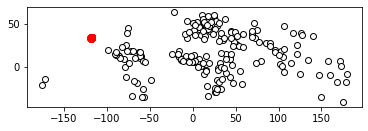

In [13]:
# following this site https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html, I'm going to see what happens if I do the cities option

vacmap = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

ax = vacmap.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame
gvac.plot(ax=ax, color='red')

plt.show()

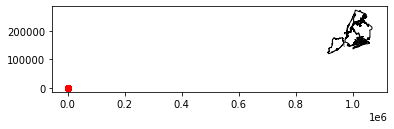

In [14]:
#what about nybb?

vacmap = gpd.read_file(gpd.datasets.get_path('nybb'))

ax = vacmap.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame
gvac.plot(ax=ax, color='red')

plt.show()

NYBB is the region of NYC, so not useful. naturalearth_cities seems to be cities around the world, and it looks like the red dot was los angeles.

What about naturalearth_lowres?

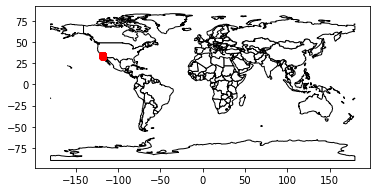

In [15]:
vacmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = vacmap.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame
gvac.plot(ax=ax, color='red')

plt.show()

In [16]:
# what is this file?
gpd.datasets.get_path('naturalearth_lowres')

'/opt/conda/lib/python3.9/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

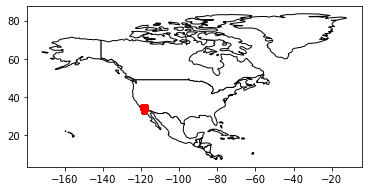

In [17]:
# can I try mapping to north america?
vacmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = vacmap[vacmap.continent == 'North America'].plot(color='white', edgecolor='black')

gvac.plot(ax=ax, color='red')

plt.show()

In [18]:
# what is in the naturalearth geodataframe? this is from the geopandas library
gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [19]:
# I want to know more about this dataframe
print("Geometry Column Name : ", vacmap.geometry.name)
print("Dataset Size : ", vacmap.shape)

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


In [20]:
# this is going to let me set the geomtry and projection accordint to this guide https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html

geometry = gpd.points_from_xy(vac.Longitude, vac.Latitude, crs="epsg:3857")

In [21]:
# i'm following this instruction to check if the project was set https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html

print(gvac.crs)

None


In [22]:
# looks like it wasn't. let me first load in basemaps 
import contextily as ctx

In [23]:
# now I will set to 3857 web mercator used in our previous lab, let's see if it goes this time
gvac =gvac.set_crs('epsg:3857')

In [24]:
# now that I set the projection, let us see what it says
gvac.crs 

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


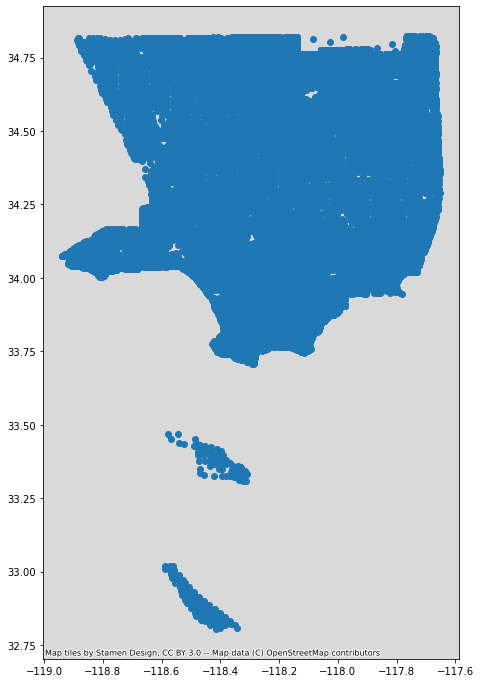

In [25]:
# ok it told us what the projection is. now let's try to plot this spatially on a map
fig,ax = plt.subplots(figsize=(12,12))

gvac.plot(ax=ax)

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [ ]:
# would like to zoom in, also not sure why stamen base map isn't loading... to work on in a future iteration!
fig,ax = plt.subplots(figsize=(12,12))
